<a href="https://colab.research.google.com/github/lopes-adriano/machine-learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de ML - Aprendizado não supervisionado

Aluno: Adriano Ferreira Lopes

Matrícula: 201802671

## K-Means Clustering

### Introdução

O K-Means é um algoritmo de clusterização utilizado no campo de aprendizado de máquina não supervisionado. Ele funciona agrupando dados em clusters baseados na similaridade entre eles. O objetivo principal é separar os dados em grupos (clusters) de forma que os itens em um mesmo cluster sejam mais semelhantes entre si do que com os itens de outros clusters. O algoritmo atribui os pontos de dados a um número pré-determinado de clusters (denotado por "K") de modo a minimizar a variância intra-cluster.

In [ ]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif', width=300, height=300)

### Aplicações

O K-Means é amplamente utilizado em diferentes áreas, como análise de mercado para segmentação de clientes, processamento de imagens para compressão e segmentação, na biologia para classificação de espécies com base em características comuns, além de diversas outras aplicações em ciência de dados, reconhecimento de padrões e mineração de dados.

### Vantagens

Vantagens do K-Means:

1. **Simplicidade:** O algoritmo é fácil de entender e implementar, tornando-o acessível mesmo para aqueles sem profundo conhecimento em aprendizado de máquina.


2. **Escalabilidade:** O K-Means é escalável para grandes conjuntos de dados, mantendo um desempenho aceitável mesmo em situações com grande volume de informações.

3. **Visualmente compreensível:** Especialmente eficaz em conjuntos de dados de baixa a média dimensionalidade, o K-Means fornece resultados que podem ser facilmente compreendidos visualmente, facilitando a análise exploratória de dados.

### Desvantagens

Desvantagens do K-Means:

1. **Sensibilidade à inicialização:** O desempenho do K-Means pode depender da escolha inicial dos centroides, podendo convergir para ótimos locais e impactar a qualidade dos clusters.

2. **Necessidade de especificar o número de clusters (K):** É necessário determinar o número de clusters a priori, o que pode ser desafiador, especialmente em conjuntos de dados onde o número ideal de clusters não é conhecido de antemão.

3. **Desafio na escolha de K:** A definição incorreta do número de clusters pode levar a agrupamentos inadequados, comprometendo a eficácia do modelo na revelação de padrões nos dados.

### Exemplo de código

In [ ]:
#Importando as bibliotecas

import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# Carregando o dataset
dataset = pd.read_csv('/content/sample_data/california_housing_train.csv')



In [ ]:
# Visualizando o dataset
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Selecionando as colunas de latitude e longitude, e o valor do imóvel
dados_geograficos = dataset[['latitude', 'longitude', 'median_house_value']]

In [ ]:
dados_geograficos.head()

,latitude,longitude,median_house_value
0,34.19,-114.31,66900.0
1,34.40,-114.47,80100.0
2,33.69,-114.56,85700.0
3,33.64,-114.57,73400.0
4,33.57,-114.57,65500.0


<Axes: xlabel='longitude', ylabel='latitude'>

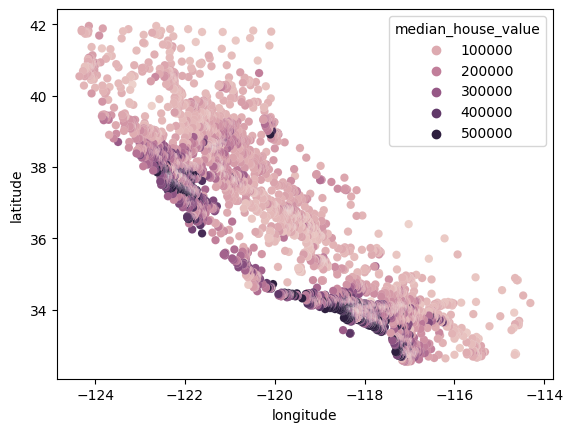

In [ ]:
from numpy.ma.extras import ediff1d
from numpy import e
# Visualizando os dados geográficos
import seaborn as sns

sns.scatterplot(data = dados_geograficos, x = 'longitude', y = 'latitude', hue = 'median_house_value', linewidth = 0.05)

In [ ]:
# Normalizando os dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados_geograficos[['latitude', 'longitude']], dados_geograficos[['median_house_value']], test_size=0.30, random_state=42)

from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [ ]:
# Escolhendo o número de clusters (neste exemplo, definimos 5 clusters)
numero_de_clusters = 5

# Aplicando o K-Means

kmeans = KMeans(n_clusters = numero_de_clusters, random_state = 42)
kmeans.fit(X_train_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

<Axes: xlabel='longitude', ylabel='latitude'>

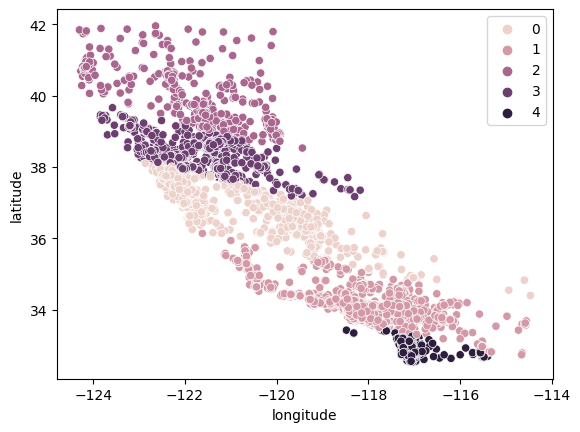

In [ ]:
# Visualizando os clusters
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

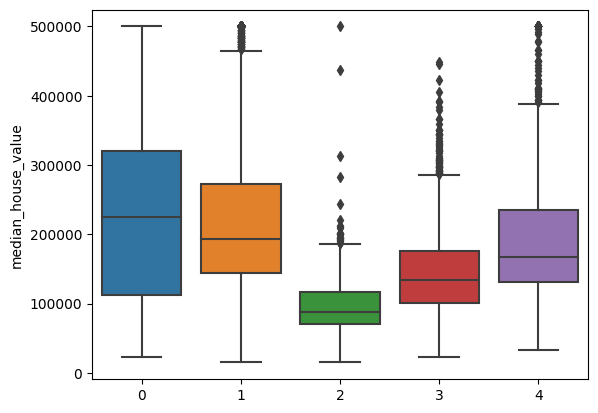

In [ ]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])